In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

fifa_data = pd.read_csv('fifa21_train.csv')
fifa_data.shape

(11701, 101)

In [2]:
fifa_data.columns = list(map(lambda x: x.lower(), fifa_data.columns))
print(fifa_data.shape)
#I took this loop from Arek's team: 
for col in fifa_data.columns:
    if fifa_data[col].isna().sum() != 0:
        print(col, fifa_data[col].isna().sum())

(11701, 101)
club 18
position 288
joined 41
loan date end 11072
volleys 41
curve 41
agility 41
balance 41
jumping 41
interceptions 7
positioning 7
vision 41
composure 279
sliding tackle 41
a/w 59
d/w 59


In [3]:
fifa_cat = fifa_data.select_dtypes('object')
fifa_num = fifa_data.select_dtypes('number')
fifa_num = fifa_num.apply(lambda x: x.fillna(x.mean()),axis=0)
fifa_data = pd.concat((fifa_num,fifa_cat), axis = 1)
fifa_data = fifa_data.drop(['loan date end'], axis = 1)
fifa_data['club'] = fifa_data['club'].replace(np.nan,'free agent')
fifa_data = fifa_data.dropna()
fifa_data.shape 
for col in fifa_data.columns:
    if fifa_data[col].isna().sum() != 0:
        print(col, fifa_data[col].isna().sum())

In [4]:
fifa_cat = fifa_data.select_dtypes('object')
def x(string):
    a = int(string.split("+")[0])
    b = int(string.split("+")[1])
    return a + b
fifa_cat_sum = fifa_cat[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']]
for column in fifa_cat_sum:
    fifa_cat_sum[column] = fifa_cat_sum[column].apply(x)
for item in fifa_cat_sum:
    fifa_cat_sum[item] = pd.to_numeric(fifa_cat_sum[item], errors='coerce')
fifa_data = fifa_data.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis = 1)
fifa_data = pd.concat((fifa_data,fifa_cat_sum), axis = 1)
#display(fifa_cat_sum)
fifa_data.shape


<ipython-input-4-695d224a1878>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_cat_sum[column] = fifa_cat_sum[column].apply(x)
<ipython-input-4-695d224a1878>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_cat_sum[item] = pd.to_numeric(fifa_cat_sum[item], errors='coerce')


(11376, 100)

In [5]:
fifa_data.select_dtypes('object').columns
fifa_data = fifa_data.drop(['name', 'nationality', 'club', 'bp', 'position', 'team & contract',
       'height', 'weight', 'foot', 'joined', 'value', 'wage', 'release clause',
       'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits'], axis = 1)


In [6]:
fifa_data.dtypes.unique

<bound method Series.unique of id           int64
age          int64
growth       int64
attacking    int64
crossing     int64
             ...  
lcb          int64
cb           int64
rcb          int64
rb           int64
gk           int64
Length: 80, dtype: object>

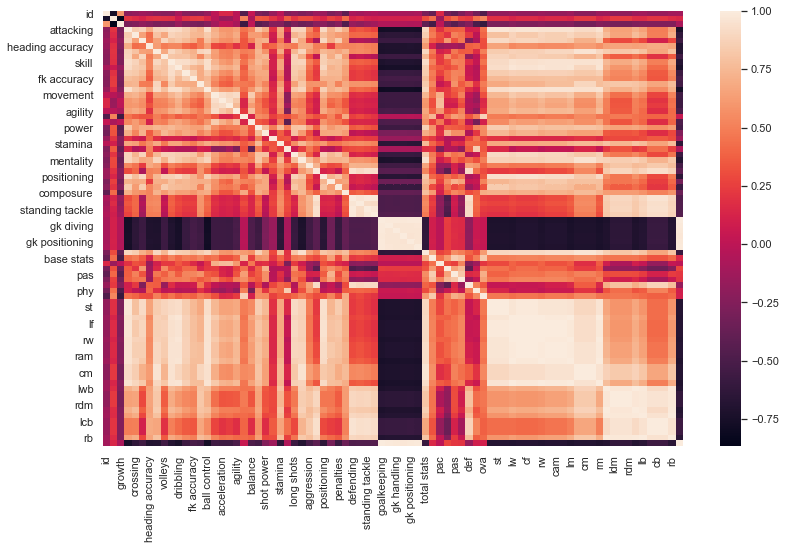

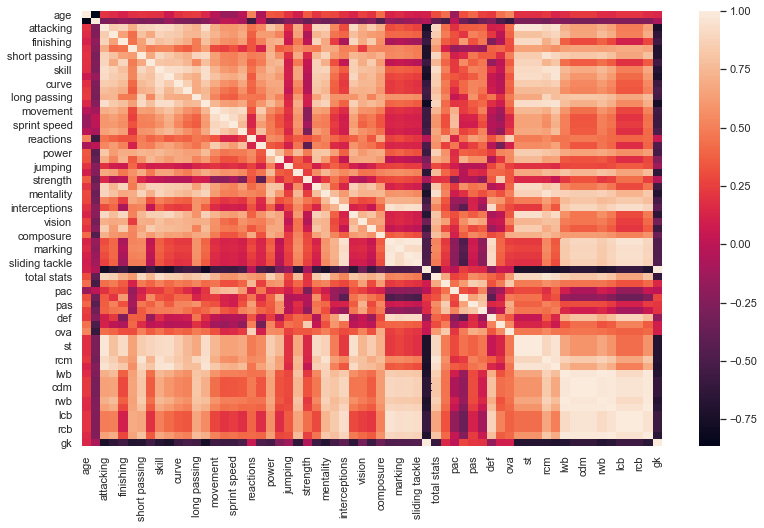

In [7]:
sns.set(rc = {'figure.figsize':(13,8)})
M_corr = fifa_data.corr()
sns.heatmap(M_corr, annot=False)
plt.show()
fifa_data.columns
fifa_data = fifa_data.drop(['lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm'], axis = 1)
fifa_data = fifa_data.drop(['gk diving', 'gk handling','gk kicking', 'gk positioning', 'gk reflexes'], axis = 1)
fifa_data = fifa_data.drop(["id",], axis = 1)
sns.set(rc = {'figure.figsize':(13,8)})
M_corr = fifa_data.corr()
sns.heatmap(M_corr, annot=False)
plt.show()

In [8]:
y = fifa_data[['ova']]
X = fifa_data.drop('ova', axis = 1)

scaler = MinMaxScaler().fit(X)
X_n = scaler.transform(X)
X_n = pd.DataFrame(X_n,columns=X.columns)


X = X_n

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9100, 62)
(2276, 62)
(9100, 1)
(2276, 1)


In [10]:

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:


predictions_train = lm.predict(X_train)
r2_train = r2_score(y_train, predictions_train)
print("R2 of train sample:",r2_train,)

predictions_test = lm.predict(X_test)
r2_test = r2_score(y_test, predictions_test)
r2_test
print('R2 test sample:',r2_test)

MSE = mean_squared_error(y_test,predictions_test)
RMSE = np.sqrt(mean_squared_error(y_test,predictions_test))
MAE = mean_absolute_error(y_test, predictions_test)
print(" MSE: \n", MSE," \n RMSE: \n", RMSE, "\n MAE: \n", MAE)


R2 of train sample: 0.9016850279402095
R2 test sample: 0.9017425874674001
 MSE: 
 4.647001095803226  
 RMSE: 
 2.1556903988753175 
 MAE: 
 1.6790569472297199


Now im going to define the functions:

In [12]:

def fifa_cleaner(df):
    import pandas as pd
    df.columns = list(map(lambda x: x.lower(), df.columns))
    #for col in df.columns:
        #if df[col].isna().sum() != 0:
            #print(col, df[col].isna().sum())

    df_cat = df.select_dtypes('object')
    df_num = df.select_dtypes('number')
    df_num = df_num.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = pd.concat((df_num,df_cat), axis = 1)
    df = df.drop('loan date end', axis = 1)
    df['club'] = df['club'].replace(np.nan,'free agent')
    df = df.dropna()
    df_cat = df.select_dtypes('object')
    def x(string):
        a = int(string.split("+")[0])
        b = int(string.split("+")[1])
        return a + b
    df_cat_sum = df_cat[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
        'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
        'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']]
    for column in df_cat_sum:
        df_cat_sum[column] = df_cat_sum[column].apply(x)
    for item in df_cat_sum:
        df_cat_sum[item] = pd.to_numeric(df_cat_sum[item], errors='coerce')
    df = df.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
        'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
        'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis = 1)
    df = pd.concat((df,df_cat_sum), axis = 1)
    df = df.drop(['name', 'nationality', 'club', 'bp', 'position', 'team & contract',
       'height', 'weight', 'foot', 'joined', 'value', 'wage', 'release clause',
       'contract', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'hits'], axis = 1)
    df = df.drop(['lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm'], axis = 1)
    df = df.drop(['gk diving', 'gk handling','gk kicking', 'gk positioning', 'gk reflexes'], axis = 1)
    df = df.drop(["id",], axis = 1)
    #global cleaner
    cleaner = df
    return cleaner





In [13]:
df = pd.read_csv('fifa21_validate.csv')
fifa_cleaner(df)
df =fifa_cleaner(df)

<ipython-input-12-ff435e73e0a7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_sum[column] = df_cat_sum[column].apply(x)
<ipython-input-12-ff435e73e0a7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_sum[item] = pd.to_numeric(df_cat_sum[item], errors='coerce')
<ipython-input-12-ff435e73e0a7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [15]:
w = df[['ova']]
Z = df.drop('ova', axis = 1)

scaler2 = MinMaxScaler().fit(Z)
Z_n = scaler2.transform(Z)
Z_n = pd.DataFrame(Z_n,columns=Z.columns)

Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size=0.2, random_state = 42)
lm2 = linear_model.LinearRegression()
lm2.fit(Z_train,w_train)

predictions_train2 = lm2.predict(Z_train)
r2_train2 = r2_score(w_train, predictions_train2)
print("R2 of train sample:",r2_train2,)

predictions_test2 = lm2.predict(Z_test)
r2_test2 = r2_score(w_test, predictions_test2)
r2_test2
print('R2 test sample:',r2_test2)

MSE2 = mean_squared_error(w_test,predictions_test2)
RMSE2 = np.sqrt(mean_squared_error(w_test, predictions_test2))
MAE2 = mean_absolute_error(w_test, predictions_test2)
print(" MSE: \n", MSE2," \n RMSE: \n", RMSE2, "\n MAE: \n", MAE2)


R2 of train sample: 0.896699821149553
R2 test sample: 0.915489615649215
 MSE: 
 4.413207878386052  
 RMSE: 
 2.1007636417231836 
 MAE: 
 1.6573413421691119
